# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = './data/ovariancancer_obs.csv'
ovariancancer_grp_path = './data/ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

Number of patients? Number of features?

In [150]:
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d features' % n_features)
print('%d patients' % n_patients)

4000 features
216 patients


How many patiens with and without cancer are there in the dataset?

In [151]:
print('%d patients with cancer' % np.sum(grp == 'Cancer'))
print('%d patients without cancer' % len(grp[grp == 'Normal']))

121 patients with cancer
95 patients without cancer


Choose two proteins (between 1 and 2000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer.

Can we easily distinguish between patients with/without cancer?

Featurs are in the rows, first index
Patients are in column, second index - we use mask which - chose element which have value true

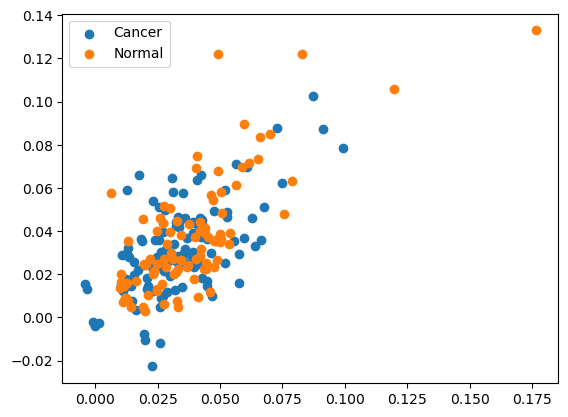

In [152]:
feature_1 = 0
feature_2 = 1
plt.scatter(A[feature_1, grp == 'Cancer'], A[feature_2, grp == 'Cancer'], label = 'Cancer')
plt.scatter(A[feature_1, grp == 'Normal'], A[feature_2, grp == 'Normal'], label = 'Normal')
plt.legend()

Same point but this time by considering three proteins.

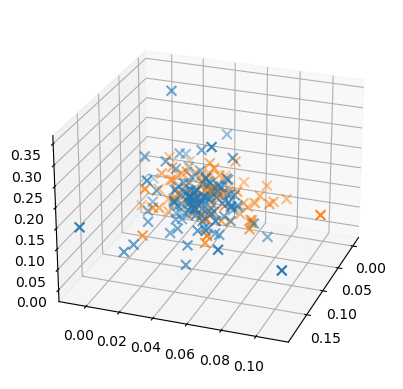

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

feature_1 = 1000
feature_2 = 2000
feature_3 = 3000

ax.scatter(A[feature_1, grp == 'Cancer'], A[feature_2, grp == 'Cancer'], A[feature_3, grp == 'Cancer'], marker='x', s=50)
ax.scatter(A[feature_1, grp == 'Normal'], A[feature_2, grp == 'Normal'], A[feature_3, grp == 'Normal'], marker='x', s=50)

ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [154]:
A_mean = np.mean(A, axis = 1)
U, s, VT = np.linalg.svd(A - A_mean[:,np.newaxis], full_matrices = False)

Text(0.5, 1.0, 'cumulate fraction of explained varience')

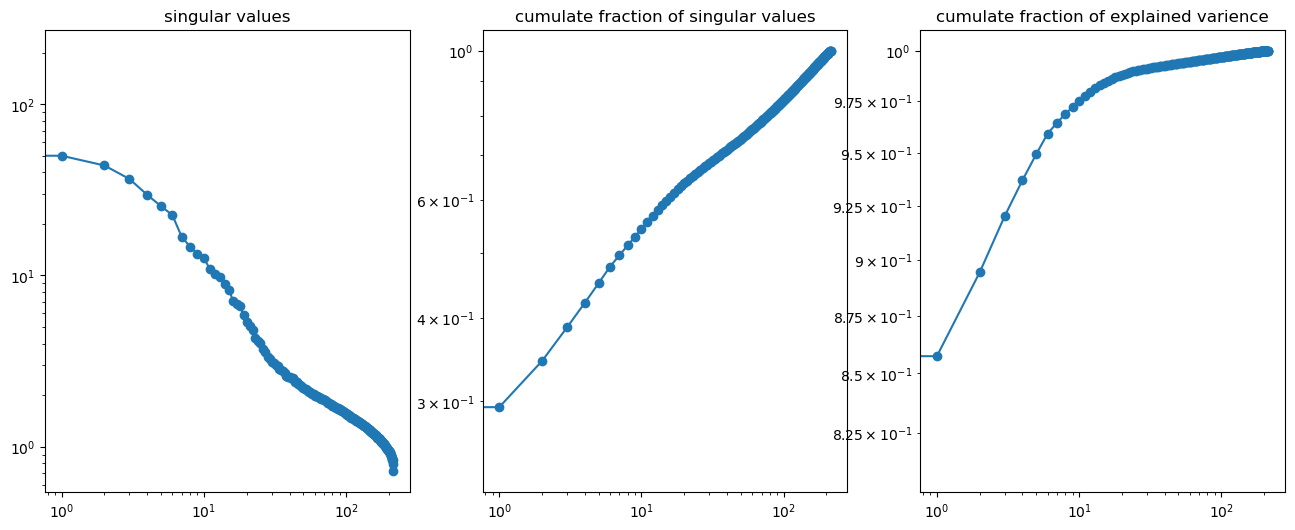

In [155]:
fig, axs = plt.subplots(1,3,figsize=(16,6))

axs[0].loglog(s[:-1], 'o-')
axs[0].set_title('singular values')

axs[1].loglog(np.cumsum(s) / np.sum(s), 'o-')
axs[1].set_title('cumulate fraction of singular values')

axs[2].loglog(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[2].set_title('cumulate fraction of explained varience')

Make a scatterplot of the first two principal components of the patients.

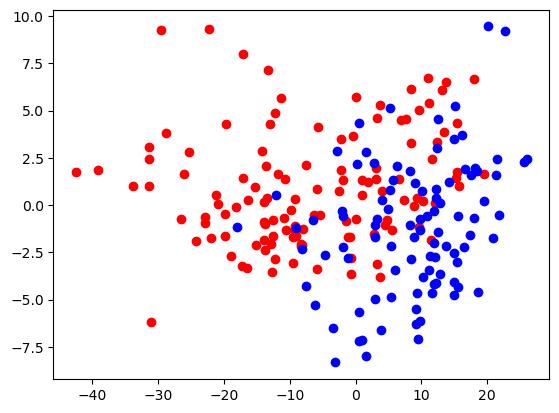

In [210]:
for i_patient in range(n_patients):
  if grp[i_patient] == 'Cancer':
    color = 'r'
  else:
    color = 'b'
  plt.scatter(np.inner(U[:,0], A[:, i_patient] - A_mean),
              np.inner(U[:,1], A[:, i_patient] - A_mean), color = color)

Make a scatterplot of the first three principal components of the patients.

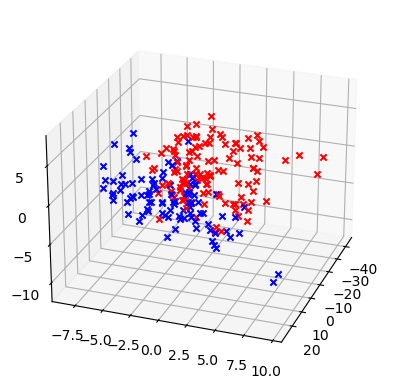

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i_patient in range(n_patients):
  if grp[i_patient] == 'Cancer':
    color = 'r'
  else:
    color = 'b'
  ax.scatter(np.inner(U[:,0], A[:, i_patient] - A_mean),
             np.inner(U[:,1], A[:, i_patient] - A_mean),
             np.inner(U[:,2], A[:, i_patient] - A_mean), color = color, marker = 'x')
  
  ax.view_init(25,20)